## **Day 28 of 30 days Data Analysis**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_clean_d08.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,NaN,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,NaN,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,NaN,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,NaN,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,NaN,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
total_sales = df["Sales"].sum()
avg_rating = df["Rating"].mean()
total_transactions = df.shape[0]
total_income = df["gross income"].sum()

print("Total Sales:", round(total_sales, 2))
print("Avg Rating:", round(avg_rating, 2))
print("Transactions:", total_transactions)
print("Gross Income:", round(total_income, 2))

Total Sales: 322966.75
Avg Rating: 6.97
Transactions: 1000
Gross Income: 15379.37


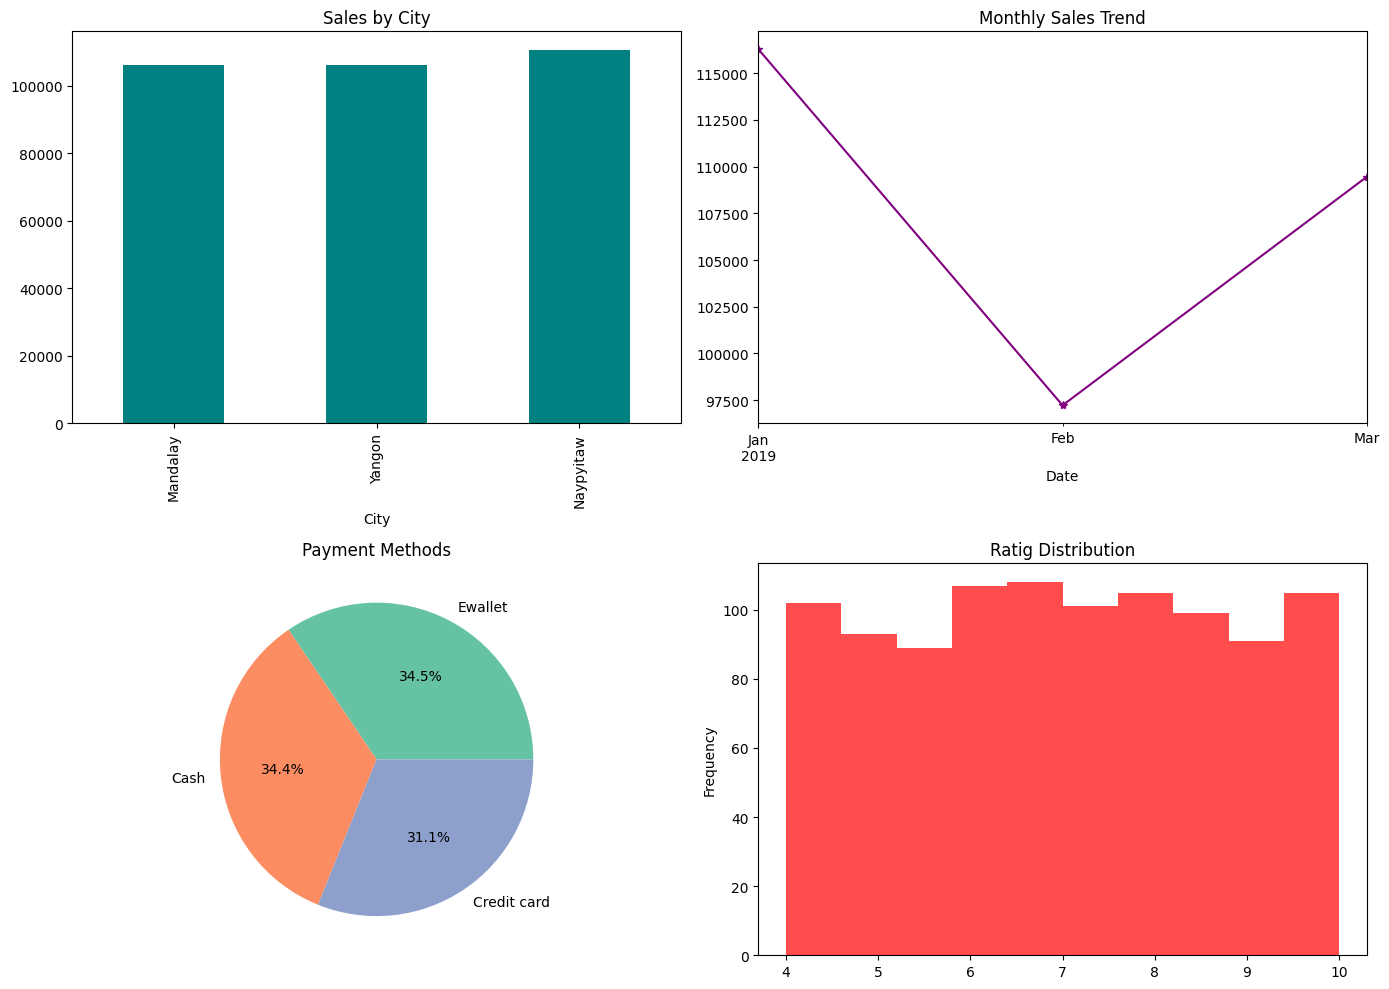

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 1. Sales by City
city_sales = df.groupby("City")["Sales"].sum().sort_values()
city_sales.plot(kind="bar", ax=axes[0,0], color="teal", title="Sales by City")

# 2. Monthly Sales Trend
if "Date" in df.columns and not np.issubdtype(df["Date"].dtype, np.datetime64):
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["MonthName"] = df["Date"].dt.month_name()
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()
monthly_sales.plot(ax=axes[0,1], marker="*", color="purple")
axes[0,1].set_title("Monthly Sales Trend")

# 3. Payment Distribution
payment_counts = df["Payment"].value_counts()
axes[1,0].pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
axes[1,0].set_title("Payment Methods")

# 4. Rating Distribution
df["Rating"].plot(kind="hist", bins=10, ax=axes[1,1], color="red", alpha=0.7)
axes[1,1].set_title("Ratig Distribution")

plt.tight_layout()
plt.savefig("day28_dashboard.png", dpi=300)

city_sales.to_csv("city_sales_day28.csv")
monthly_sales.to_csv("monthly_sales_day28.csv")
payment_counts.to_csv("payment_counts_day28.csv")

### ***Day 28 — Final Dashboard***

***Objective:*** 

*Build a clean, summarized dashboard to highlight key insights from the supermarket dataset.*

***KPIs:***

*- Total Sales*

*- Gross Income*

*- Transactions*

*- Average Customer Rating*

***Visualizations:***

*- Sales by City*

*- Monthly Sales Trend*

*- Payment Method Distribution*

*- Rating Distribution*

***Outputs:***

*- Dashboard image saved as: `day28_dashboard.png`*

*- Supporting CSV exports for city sales, monthly sales, and payment counts.*

*This dashboard is ready to be showcased in the portfolio.*